In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MaxAbsScaler

In [2]:
df = pd.read_excel ('gas-turbine.xlsx')
X = np.array(df[[
't_in_comp','t_housing_comp','t_housing2_turb','t_housing4_turb','t_out_turb','gas_fuel_flow','gas_fuel_pres','liq_fuel_flow','liq_fuel_pres']])
y = np.array(df[['real_power','app_power','react_power']])

## Ejercicio 1

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = MLPRegressor(random_state=0)
clf.fit(X_train, y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
res_ejercicio1 = pd.DataFrame([[mse_train, r2_train], [mse_test, r2_test]],
                              index = ["Train", "Test"],
                              columns = ["MSE", "R2"])
display(res_ejercicio1)
print("20% Test, hiperparámetros por defecto")

,MSE,R2
Train,452182.038767,0.661319
Test,153271.321075,0.712032


20% Test, hiperparámetros por defecto


## Ejercicio 2

In [4]:
resultado = []
for i in range(20):
    clf = MLPRegressor(random_state=i)
    clf.fit(X_train, y_train)

    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_test = mean_squared_error(y_test, y_test_predict)
    resultado.append([i, mse_train, mse_test])
    display([i, mse_train, mse_test])
resultado = np.array(resultado)

[0, 452182.0387666744, 153271.3210746133]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[1, 455718.6415533912, 160870.33206352327]

[2, 455622.2645730108, 159789.30282049495]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[3, 453998.07198440394, 157668.16227367066]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[4, 449623.8224702138, 151217.10706127237]

[5, 452872.73790301173, 155430.2644288343]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[6, 454313.3909579727, 158569.40379458823]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[7, 453312.2915525716, 156908.4780343962]

[8, 455071.71572623006, 158790.03331001077]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[9, 454036.2360475808, 156702.78601086614]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[10, 451309.7409077356, 153171.8663986098]

[11, 458336.956243481, 161183.07470073036]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[12, 455552.67217489984, 159342.7885023095]

[13, 457126.3006203256, 161235.27451522573]

[14, 454633.8509942377, 157319.19688894015]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[15, 451554.5104770139, 154288.91093619235]

[16, 455515.50868787564, 159432.8344044283]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[17, 453272.8598973464, 156254.30098018888]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[18, 451526.55376359244, 155914.18065109095]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[19, 457173.0418689733, 161719.32709449888]

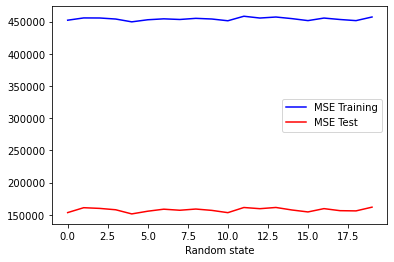

In [5]:
plt.plot(resultado[:,0], resultado[:,1], color='blue')
plt.plot(resultado[:,0], resultado[:,2], color='red')
plt.xlabel('Random state')
plt.legend(["MSE Training", "MSE Test"])
plt.show()

## Ejercicio 3

In [6]:
resultado = []
for i in range(7):
    capas = ((50,)*i)
    clf = MLPRegressor(hidden_layer_sizes=capas, random_state=0)
    clf.fit(X_train, y_train)

    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_test = mean_squared_error(y_test, y_test_predict)
    res = [i, mse_train, mse_test]
    resultado.append(res)
    display([i, mse_train, mse_test, capas])
resultado = np.array(resultado)

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0, 674140.7443836366, 376153.18348640733, ()]

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[1, 458140.7544868105, 164329.25612542432, (50,)]

[2, 440553.078417822, 140780.62542471243, (50, 50)]

[3, 441023.1376495136, 140409.91387292303, (50, 50, 50)]

[4, 437637.5844939851, 138445.29881975192, (50, 50, 50, 50)]

[5, 454487.95623740903, 153367.26194067902, (50, 50, 50, 50, 50)]

[6, 435169.2644440208, 136755.25679409728, (50, 50, 50, 50, 50, 50)]

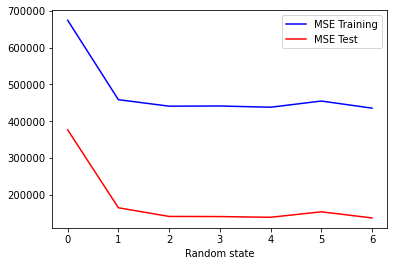

In [7]:
plt.plot(resultado[:,0], resultado[:,1], color='blue')
plt.plot(resultado[:,0], resultado[:,2], color='red')
plt.xlabel('Random state')
plt.legend(["MSE Training", "MSE Test"])
plt.show()

## Ejercicio 4

In [8]:
scaler = MaxAbsScaler().fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
mlp = MLPRegressor(random_state = 0, solver='adam')
parameters = {'max_iter':[200, 400], 
              'hidden_layer_sizes':[((50,)*3), ((50,)*6)],
              'activation': ('identity', 'relu'),
              'alpha': [0.01, 1],
              'batch_size': [1,100]}
clf = GridSearchCV(mlp, parameters, scoring='neg_mean_squared_error', cv=2, n_jobs=-1, verbose=0)
clf.fit(X_train_scaled, y_train)
mydict = {'params':clf.cv_results_['params'],
          'rank_test_score':clf.cv_results_['rank_test_score'],
          'mean_test_score':clf.cv_results_['mean_test_score']}
mydata = pd.DataFrame.from_dict(mydict)
print("Primera iteración")
print(mydata[mydata.rank_test_score == 1].to_numpy())

Primera iteración
[[{'activation': 'relu', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 200}
  1 -440940.99279557256]
 [{'activation': 'relu', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 400}
  1 -440940.99279557256]]


In [10]:
mlp = MLPRegressor(random_state = 0, solver='adam', activation='relu', max_iter=200)
parameters = {'hidden_layer_sizes':[((50,)*5), ((50,)*6), ((50,)*7)],
              'alpha': [0.001, 0.01, 0.1],
              'batch_size': [50, 100, 150]}
clf = GridSearchCV(mlp, parameters, scoring='neg_mean_squared_error', cv=2, n_jobs=-1, verbose=0)
clf.fit(X_train_scaled, y_train)
print("Segunda iteración")
mydict = {'params':clf.cv_results_['params'],
          'rank_test_score':clf.cv_results_['rank_test_score'],
          'mean_test_score':clf.cv_results_['mean_test_score']}
mydata = pd.DataFrame.from_dict(mydict)
print(mydata[mydata.rank_test_score == 1].to_numpy())

Segunda iteración
[[{'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50)}
  1 -440940.99279557256]]


In [11]:
clf = MLPRegressor(random_state = 0,
                   solver='adam',
                   activation='relu',
                   max_iter=200,
                   hidden_layer_sizes=((50,)*6),
                   alpha=0.01,
                   batch_size=100)
clf.fit(X_train_scaled, y_train)

y_train_predict = clf.predict(X_train_scaled)
y_test_predict = clf.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
res_ejercicio4 = pd.DataFrame([[mse_train, r2_train], [mse_test, r2_test]],
                              index = ["Train", "Test"],
                              columns = ["MSE", "R2"])
display(res_ejercicio1)
print("20% Test, hiperparámetros por defecto")
display(res_ejercicio4)
print("20% Test, hiperparámetros ajustados")

,MSE,R2
Train,452182.038767,0.661319
Test,153271.321075,0.712032


20% Test, hiperparámetros por defecto


,MSE,R2
Train,436488.293717,0.670909
Test,138492.684993,0.730556


20% Test, hiperparámetros ajustados


## Ejercicio 5

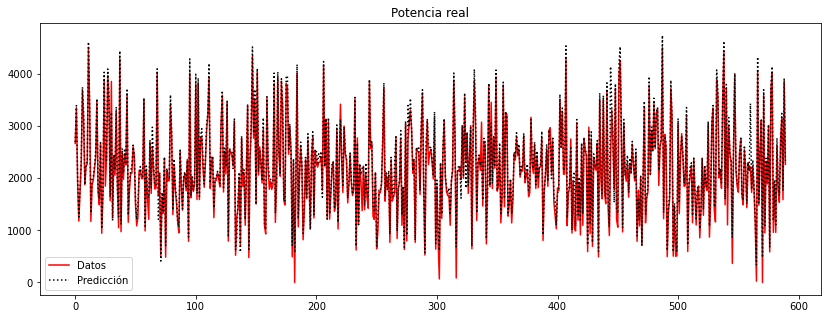

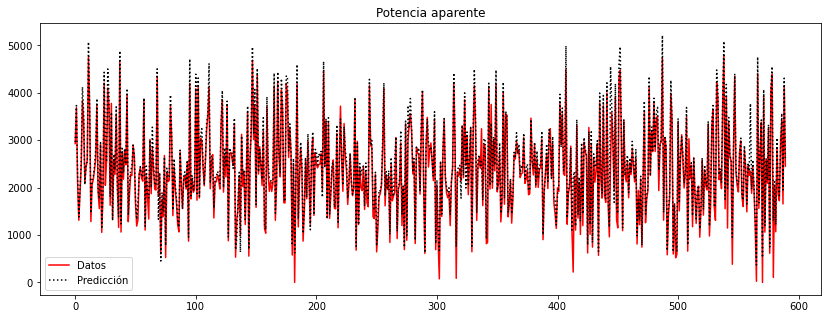

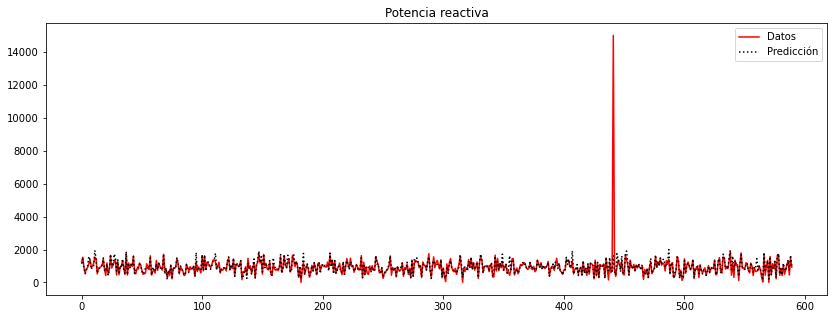

In [34]:
figure(figsize = (14, 5))
plt.plot(y_test[:,0]         , color='red',   label='Datos')
plt.plot(y_test_predict[:,0] , color='black', label='Predicción', linestyle='dotted')
plt.title("Potencia real")
plt.legend()
plt.show()

figure(figsize = (14, 5))
plt.plot(y_test[:,1]         , color='red',   label='Datos')
plt.plot(y_test_predict[:,1] , color='black', label='Predicción', linestyle='dotted')
plt.title("Potencia aparente")
plt.legend()
plt.show()

figure(figsize = (14, 5))
plt.plot(y_test[:,2]         , color='red',   label='Datos')
plt.plot(y_test_predict[:,2] , color='black', label='Predicción', linestyle='dotted')
plt.title("Potencia reactiva")
plt.legend()
plt.show()

## Ejercicio 6